### 로이터 뉴스의 기사가 들어가면 어떤 주제인지를 예측해보자!(다중분류)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [2]:
data = reuters.load_data()
data

C:\Users\smhrd\anaconda3\envs\deep\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\smhrd\anaconda3\envs\deep\lib\site-packages\tensorflow_core\python\keras\datasets\reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
         list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
         list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 

In [3]:
len(data)

2

In [4]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [6]:
X_train[0]

# 실제 글자를 다 숫자로 변경시켜서 전처리 해둔 데이터(숫자 하나하나가 원래는 다 단어)
# 현재 로이터 뉴스 데이터셋은 레이블 인코딩으로 인코딩을 해줬음
# + 각 단어들은 빈도수를 기반으로 순위를 매겨 레이블 인코딩이 되어있음


# -> 단어가 많은 경우 원핫인코딩을 사용하면 한 단어를 제외하고는 전부 0으로 표시
#되기 때문에 저장 공간측면에서 비효율적임
# -> 텍스트 처리 분야에서는 문제 데이터에 레이블 인코딩을 활용하면 단어의 빈도수까지 고려해줄 수 있음
# 단어의 빈도수까지 고려해줄 수 있음

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
len(X_train[0])
# 첫번째 뉴스기사는 87개의 단어로 이루어져 있음

87

In [8]:
len(X_train[1])

56

In [9]:
# 로이터 뉴스기사의 단어들 별로 어떤 숫자로 인코딩 되어있는지 확인 가능
reuters.get_word_index()

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [10]:
# 뉴스의 주제 개수를 알아보기 - 46가지의 종류의 주제가 존재함
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

- CNN도 이미지 데이터를 모두 같은 크기로 변경시켰듯이 RNN도 뉴스기사의 단어 개수를 같이 맞춰줘야함
- 긴 기사는 잘라내고 짧은 기사는 붙여 넣어 줘야함(padding을 사용)

#### 시퀀스 길이 맞추기(몇 번의 순환을 할지 똑같이 맞춰주기)

In [11]:
X_train

array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4

In [12]:
# 각 뉴스 기사들의 길이를 계산
train_len = [len(i) for i in X_train]
# X_train에 있는 8900여개의 뉴스기사를 각각 i에 담아주면서 그 길이를 구해서 
# list에 담아주는 코드

In [13]:
print('최대값 : ',max(train_len))
print('최소값 : ',min(train_len))
print('평균값 : ',np.mean(train_len))
print('중앙값 : ',np.median(train_len))

최대값 :  2376
최소값 :  13
평균값 :  145.5398574927633
중앙값 :  95.0


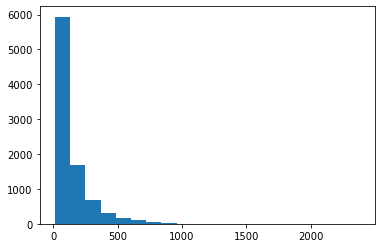

In [14]:
# 히스토그램으로 데이터의 밀도 구성을 확인
#세로 축은 뉴스기사의 단어 개수, 가로축은 뉴스 길이를 각 구간별로 표시
plt.hist(train_len, bins=20)#bins : 몇개의 구간으로 나눌지를 결정
#plt.ylim(0,10) #수치값 범위설정
plt.show()

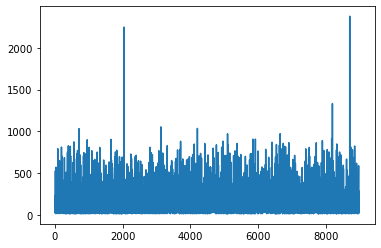

In [15]:
# 라인차트로 각 기사별로 크기가 얼마큼 되는지 대략적인 상황을 파악
# 가로는 각 뉴스 기사의 인덱스, 세로는 뉴스의 단어 길이
plt.plot(train_len)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

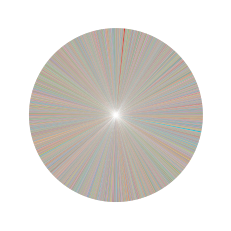

In [16]:
plt.pie(train_len)
plt.show
# 예쁜 쓰레기

#### 문제 데이터 가공
- 전체 분포를 고려해 110개 정도 시퀀스 길이(timesteps)로 만들어보자(단어를 110번 순환)

In [19]:
# 시퀀스 길이(순환 횟수)를 변경시켜주는 모듈
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [20]:
# X_train, X_test에서 시퀀스 길이를 110으로 설정
X_train_pad = sequence.pad_sequences(X_train, maxlen=110)
X_test_pad = sequence.pad_sequences(X_test, maxlen=110)

- 딥러닝은 초대량의 데이터를 가지고 결과를 예측하는 것이기 때문에 분포가 적은 부분을 신경쓸 필요는 없음
- 110개 이상인 뉴스들의 분포는 크지 않다고 봄(데이터가 워낙 많기 때문에 잘라도 상관없음)

In [23]:
X_train[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [25]:
X_train_pad[0]
# RNN에서 패팅(padding)을 진행하면 앞에서부터 0이 채워짐
# -> 뒤쪽에 0이 들어가면 후반부 연산에 값이 제대로 전달되지 않을 수 있음
# 초반 신경망 순환에는 0이 들어감(아무런 연산 결과가 나오지 않음)
# 1부터 연산이 진행


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     1, 27595, 28842,     8,
          43,    10,   447,     5,    25,   207,   270,     5,  3095,
         111,    16,   369,   186,    90,    67,     7,    89,     5,
          19,   102,     6,    19,   124,    15,    90,    67,    84,
          22,   482,    26,     7,    48,     4,    49,     8,   864,
          39,   209,   154,     6,   151,     6,    83,    11,    15,
          22,   155,    11,    15,     7,    48,     9,  4579,  1005,
         504,     6,   258,     6,   272,    11,    15,    22,   134,
          44,    11,    15,    16,     8,   197,  1245,    90,    67,
          52,    29,   209,    30,    32,   132,     6,   109,    15,
          17,    12])

In [26]:
len(X_train_pad[0])

110

In [27]:
X_train_pad.shape

(8982, 110)

- timesteps : hello 학습시에는 h,e,l,l이라는 총 4개의 문자가 들어갔기 때문에 4였고, 현재는 각 단어가 110개 이고 110번 순환시키기 때문에 110으로 설정
- features : hello 학습시에는 원핫인코딩을 통해서 정답 단어가 9개였기 때문에 9로 설정했고, 현재 데이터셋은 단어가 숫자 하나로만 표시되어져 있기 때문에 features는 1이 됨

In [30]:
X_train_pad_reshape = X_train_pad.reshape(X_train_pad.shape[0],   # 8982
                                           X_train_pad.shape[1],   # 110
                                           1)

In [32]:
X_test_pad.shape

(2246, 110)

In [33]:
X_test_pad_reshape = X_test_pad.reshape(X_test_pad.shape[0],   # 2246
                                           X_test_pad.shape[1],   # 110
                                           1)

In [35]:
X_train_pad_reshape.shape, X_test_pad_reshape.shape
# 샘플수, timesteps, features

((8982, 110, 1), (2246, 110, 1))

- 정답 데이터를 확률정보로 변경 

In [37]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [39]:
y_train_one_hot.shape, y_test_one_hot.shape
# 샘플수, timesteps, features

((8982, 46), (2246, 46))

### 신경망 모델링

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [41]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(110,1)))# 원핫인코딩 되었다면 fetures가 바귀어서 들어가야함

model.add(Dense(16, activation='relu'))

# 출력층
# 뉴스기사를 46개의 주제로 분류하는 문제이기 때문에 뉴런의 수는 46, 활성화 함수는
# softmax
model.add(Dense(46, activation='softmax'))

In [42]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'Adam',
             metrics = ['acc']
             )

In [43]:
h = model.fit(X_train_pad_reshape, y_train_one_hot,
             validation_split = 0.2,
             epochs = 50
             )

Train on 7185 samples, validate on 1797 samples
Epoch 1/50
7185/7185 [==============================] - 9s 1ms/sample - loss: 2.7606 - acc: 0.2795 - val_loss: 2.4077 - val_acc: 0.3450
Epoch 2/50
7185/7185 [==============================] - 7s 1ms/sample - loss: 2.4102 - acc: 0.3534 - val_loss: 2.4032 - val_acc: 0.3450
Epoch 3/50
7185/7185 [==============================] - 7s 1ms/sample - loss: 2.4057 - acc: 0.3534 - val_loss: 2.4039 - val_acc: 0.3450
Epoch 4/50
7185/7185 [==============================] - 7s 1ms/sample - loss: 2.3934 - acc: 0.3546 - val_loss: 2.3841 - val_acc: 0.3511
Epoch 5/50
7185/7185 [==============================] - 7s 1ms/sample - loss: 2.3810 - acc: 0.3550 - val_loss: 2.3873 - val_acc: 0.3450
Epoch 6/50
7185/7185 [==============================] - 7s 1ms/sample - loss: 2.3640 - acc: 0.3595 - val_loss: 2.3659 - val_acc: 0.3534
Epoch 7/50
7185/7185 [==============================] - 7s 1ms/sample - loss: 2.3557 - acc: 0.3624 - val_loss: 2.3498 - val_acc: 0.3578


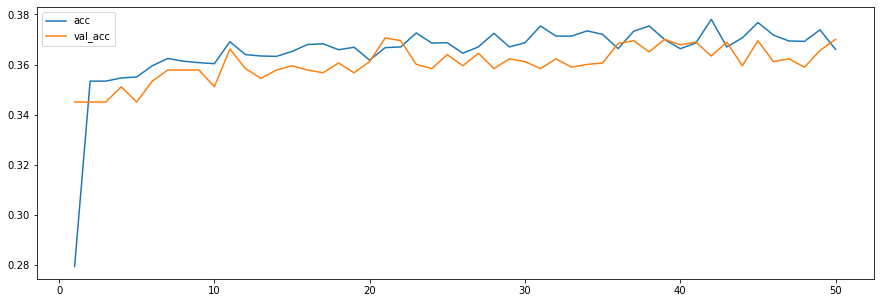

In [44]:
plt.figure(figsize=(15,5))

plt.plot(range(1,51,1),
        h.history['acc'],
        label = 'acc'
        )

plt.plot(range(1,51,1),
        h.history['val_acc'],
        label = 'val_acc'
        )
plt.legend()
plt.show()

- SimpleRNN만 가지고는 복잡한 뉴스 데이터를 다 분류해낼 수 없음